In [22]:
# Here we are trying to plot the distribution of perspective on a spectrum of 'support' to 'oppose'
import pandas as pd
iaa_path = "/home/squirrel/ccg-new/projects/perspective/data/pilot1_persp_verification/persp_iaa.csv"
filtered_iaa_path = "/home/squirrel/ccg-new/projects/perspective/data/pilot1_persp_verification/persp_iaa_w_source.csv"

iaa_df = pd.read_csv(iaa_path)
iaa_df.info()

fiaa_df = pd.read_csv(filtered_iaa_path)
fiaa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8135 entries, 0 to 8134
Data columns (total 10 columns):
claim                   8135 non-null int64
perspective             8135 non-null int64
sup                     8135 non-null int64
und                     8135 non-null int64
ns                      8135 non-null int64
suporting (scaled)      8135 non-null float64
undermining (scaled)    8135 non-null float64
not sure (scaled)       8135 non-null float64
P_i                     8135 non-null float64
Total                   8135 non-null int64
dtypes: float64(4), int64(6)
memory usage: 635.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 13 columns):
claim                   4743 non-null int64
perspective             4743 non-null int64
sup                     4743 non-null int64
und                     4743 non-null int64
ns                      4743 non-null int64
suporting (scaled)      4743 non-null float64
undermining (scaled)

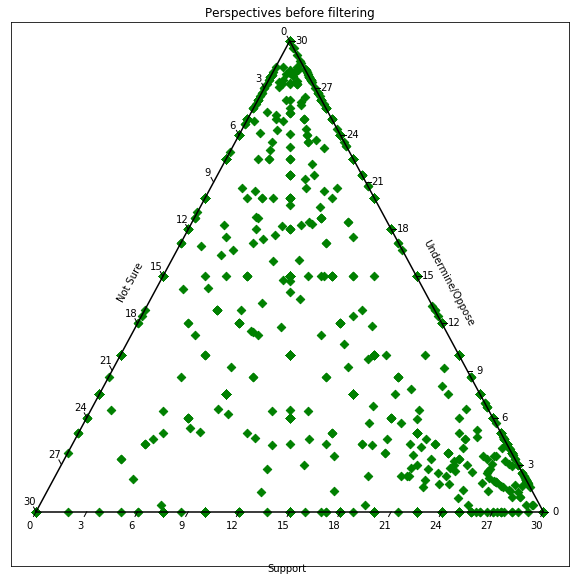

In [38]:
import ternary
from collections import Counter
import math

scale = 30

# get scaled support and undermining tuples
l = list(zip(iaa_df['suporting (scaled)'] * 10, iaa_df['undermining (scaled)'] * 10, iaa_df['not sure (scaled)'] * 10))
data = dict(Counter(l))

# print(l)
# log_data = {k: math.log(v, 10) for k, v in data.items()}

figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 10)

# tax.heatmap(log_data, style='h')
tax.scatter(l, marker='D', color='green', label="Green Diamonds")

tax.ticks(axis='lbr', linewidth=1, multiple=3)
tax.left_axis_label("Not Sure")
tax.right_axis_label("Undermine/Oppose")
tax.bottom_axis_label("Support")

tax.boundary()
tax.set_title("Perspectives before filtering")
tax.clear_matplotlib_ticks()

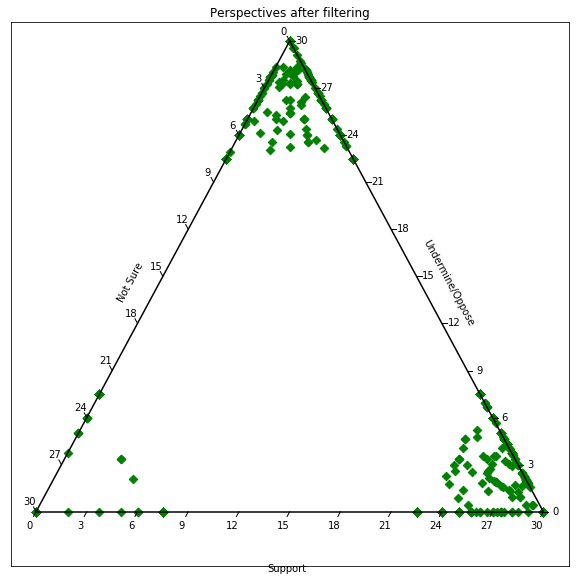

In [36]:
scale = 30

# get scaled support and undermining tuples
l = list(zip(fiaa_df['suporting (scaled)'] * 10, fiaa_df['undermining (scaled)'] * 10, fiaa_df['not sure (scaled)'] * 10))
data = dict(Counter(l))

# print(l)
# log_data = {k: math.log(v, 10) for k, v in data.items()}

figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 10)

# tax.heatmap(log_data, style='h')
tax.scatter(l, marker='D', color='green', label="Green Diamonds")

tax.ticks(axis='lbr', linewidth=1, multiple=3)

tax.left_axis_label("Not Sure")
tax.right_axis_label("Undermine/Oppose")
tax.bottom_axis_label("Support")

tax.boundary()
tax.set_title("Perspectives after filtering")
tax.clear_matplotlib_ticks()